In [4]:
import re

def extract_compare(item):
    regex = r"(.*)\((.*)\)"
    match = re.match(regex, item)
    if not match:
        raise RuntimeError(f"Operation not defined correctly {item}")
    _, parameters = match.groups()
    branches, trunk = parameters.split(";")
    return trunk, branches.split(",")

def operationSorting(arr):
    n = len(arr)
    items = [(extract_compare(e), e) for e in arr]

    i = 0
    while i<n:
        item1 = items[i]
        for j in range(i+1, n):
            item2 = items[j]
            if item1[0][0] in item2[0][1]:
                items.pop(i)
                items.insert(j, item1)
                break
        else:
            i += 1
    return list(map(lambda x: x[1], items))

{'0': (99.0, 234.0), '1': (99.0, 162.0), '2': (27.0, 90.0), '3': (27.0, 18.0), '4': (99.0, 90.0), '5': (99.0, 18.0), '6': (171.0, 90.0), '7': (171.0, 18.0)}


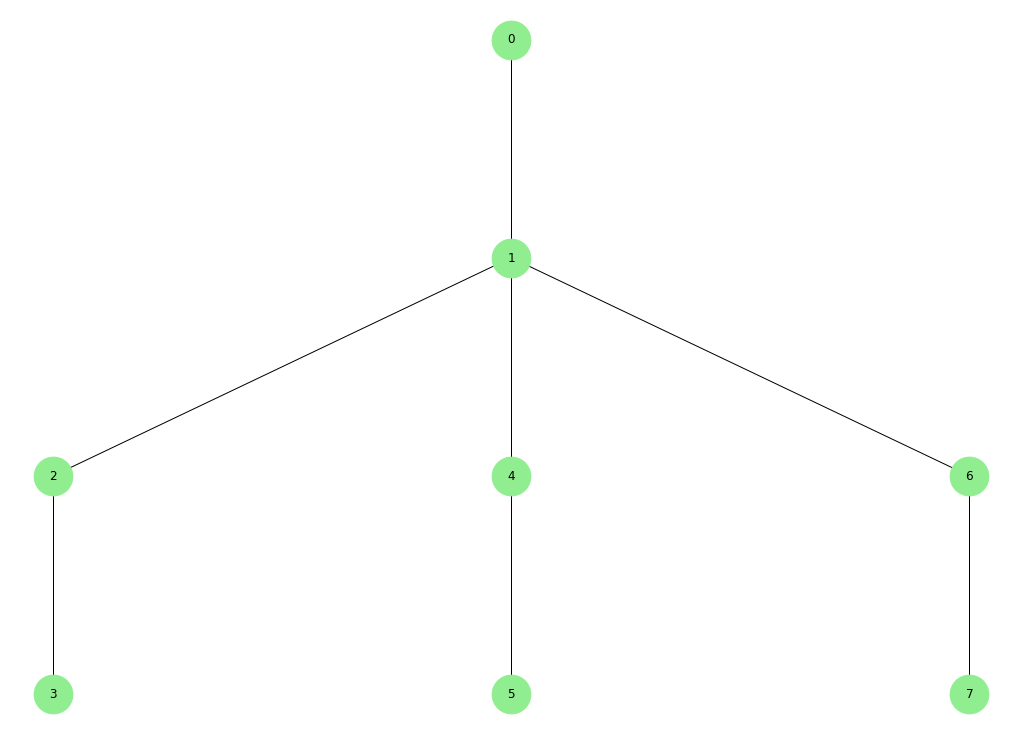

In [7]:
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
from pylab import rcParams
import pandas as pd

tree_str = "a(1;0)|b(2,4,6;1)|c(3;2)|d(5;4)|e(7;6)"

# paths = df.loc[:,'BUILDING':].stack().groupby(level=0).agg(list).values.tolist()
paths = [["0", "1", "2", "3"], ["0", "1", "4", "5"], ["0", "1", "6", "7"]]
G = nx.DiGraph()
for path in paths:
    nx.add_path(G, path)

rcParams["figure.figsize"] = 14, 10
pos = graphviz_layout(G, prog="dot", root=None )

# for p in pos:

#     yOffSet = -300
#     xOffSet = -400

#     pos[p] = (pos[p][0]+xOffSet,pos[p][1]+yOffSet)


nx.draw(
    G, pos=pos, node_color="lightgreen", node_size=1500, with_labels=True, arrows=False, 
)

print(pos)


In [ ]:
tree_str = "a(1;0)|b(2,4,6;1)|c(3;2)|d(5;4)|e(7;6)"


https://stackoverflow.com/questions/49368341/position-showing-of-labels-with-networkx-graphviz


https://stackoverflow.com/questions/20213956/plot-a-tree-like-graph-with-root-node-at-the-top


https://plotly.com/python/tree-plots/

dist_between nodes: 72

[[0.0, 0.0], [-1.0, 1.0], [-1.5, 2.0], [-2.0, 3.0], [-2.0, 4.0], [-0.5, 2.0], [-1.0, 3.0], [-1.0, 4.0], [-1.0, 5.0], [0.0, 1.0], [1.0, 1.0], [1.0, 2.0]]


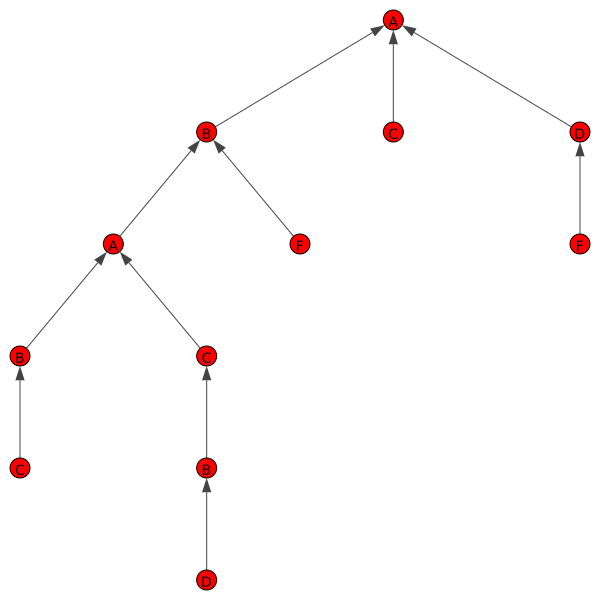

In [8]:
import igraph as ig
# import cairo
# import cairocffi

g = ig.Graph(n = 12, directed=True)
g.add_edges([(1,0),(2,1), (3,2), (4,3),
         (5,1),
         (6,2), (7,6), (8,7),
         (9,0),
         (10,0), (11,10)])
g.vs["label"] = ["A", "B", "A", "B", "C", "F", "C", "B", "D", "C", "D", "F"]
layout = g.layout_reingold_tilford(mode="in", root=[0] )
print(layout.coords)
# layout = layout.scale(1)
ig.plot(g, layout=layout)
